# Task 1: Prediction using Supervised ML

## Problem Statement:
                  1.Predict the percentage of an student based on the no. of study hours.
                  2.What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("*******************************************")
print("\tData imported successfully")
print("*******************************************")
s_data.head(10)

*******************************************
	Data imported successfully
*******************************************


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#  let's visualize our Data first
# Data type of the given data
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

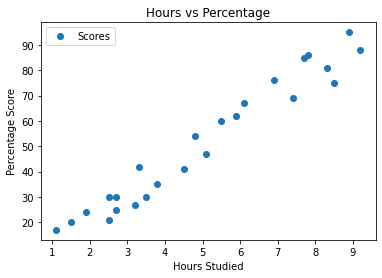

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


From the graph, we can clearly observe and understand that there exists a +ve linear relationship between the variables 'Hours Studied' and 'Percentage Score' which is ideal to perform Linear Regression.


## Let's Prepare the Data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

## Let's Split the Data
We will now split this data into training and test sets.

We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 , random_state=0)
            

# 

## Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

We will do this using Linear Regression technique

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("*********Training is completed*********")


*********Training is completed*********


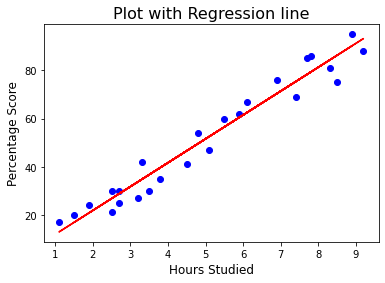

	****** Training Complete! ******


In [11]:
# Let's plot the Regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.title('Plot with Regression line',size=16)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Percentage Score', size=12)
plt.scatter(X, y, color = 'blue')
plt.plot(X, line, color = 'red');
plt.show()

print("\t****** Training Complete! ******")

In [12]:
print(X_test) # Testing data 
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted Scores
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


 ## Testing with the given data (9.25 hrs/day)


In [15]:
hours = 9.25
own_pred = round(regressor.predict([[9.25]])[0],3)
print("*********************************************")
print("\tNo of Hours = {}".format(hours))
print("\tPredicted Score = {}".format(own_pred))
print("*********************************************")

*********************************************
	No of Hours = 9.25
	Predicted Score = 93.692
*********************************************


Therefore, if a student studies for 9.25 hours then, he is expected to score 93.692

And now,let's evaluate the performance of our Algorithm.

Since we are dealing with numerical data, finding Mean Absolute Error would be hingly considered to evaluate the Linear Regression model.

In [17]:
#Accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
